# Parameter Seach for MCTS




In [2]:
from MCTS.mcts import MCTS
import gymnasium as gym
import numpy as np
from gymnasium import register
import yaml

import matplotlib.pyplot as plt

## Define gym env

In [12]:
register(
    id="WalledGridWorld-v0",
    entry_point="envs.walled_gridworld:WalledGridworld",
    max_episode_steps=300
)


In [13]:
with open('./MAPS.yaml','r') as f:
     MAPS  = yaml.load(f,Loader=yaml.FullLoader)


map_name="9x9"
size = 9

env = gym.make("WalledGridWorld-v0",size = size,target_objects = [i for i in range(6)],max_steps = 20,seed=123,map_name=map_name)

In [39]:
params = {"c":[0.5,0.75,1,1.44,2,10],
          "m":[1000],
          "gamma":[0.7,0.8,0.9,0.99],
          "d": [100]}

In [40]:
def do_mcts(env,params):
    env = gym.make("WalledGridWorld-v0",size = size,target_objects = [i for i in range(6)],max_steps = 20,seed=123,map_name=map_name)
    state = env.reset()
    mcts = MCTS(env,state,params['d'],params['m'],params['c'],params['gamma'])
    done = False
    while not done:
        action = mcts.search()
        observation,reward,done,truncated, info = env.step(action=action)
    return info["objects_collected"]



In [41]:
num_iters = 5

p = ParameterGrid(params)
best_score = -1

for param in p:
    scores = []
    for _ in range(num_iters):
        scores.append(do_mcts(env,param))
    print(f"Done: {p}")
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_params = param
        print(best_params)
    


Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
{'c': 0.5, 'd': 100, 'gamma': 0.7, 'm': 1000}
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
{'c': 0.5, 'd': 100, 'gamma': 0.8, 'm': 1000}
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
{'c': 0.5, 'd': 100, 'gamma': 0.9, 'm': 1000}
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
Done: <sklearn.model_selection._search.ParameterGrid object at 0x2a6f7d4d0>
{'c': 1, 'd': 100, 'gamma'

In [42]:
best_params

{'c': 1, 'd': 100, 'gamma': 0.99, 'm': 1000}

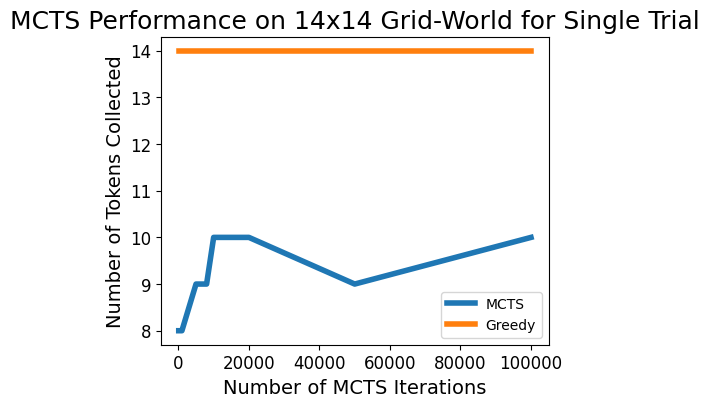

In [24]:
m = [100,500,1000,5000,8000,10000,15000,20000,50000,100000]

objects_found = [8,8,8,9,9,10,10,10,9,10]

fig = plt.figure(figsize=(5,4))

plt.plot(m,objects_found,linewidth = '4')
plt.plot(m,[14 for _ in m],linewidth = '4')
plt.xlabel("Number of MCTS Iterations",fontsize=14)
plt.ylabel("Number of Tokens Collected",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("MCTS Performance on 14x14 Grid-World for Single Trial",fontsize=18)
plt.legend(["MCTS","Greedy"])
plt.savefig("mcts_performance.png",bbox_inches='tight')